In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv("/content/uk_gov_data_dense_preproc.csv", encoding="iso-8859-1")

data.head()

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
4,5.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0


Data sets containing information about 6756 vehicles. The fields are:

*  car_id : Number - A unique identifier for each vehicle.
*  manufacturer : String
*  model : String
*  description : String
*  transmission : String - Gearbox identifier if applicable.
*  transmission_type : String - "Manual", "Automatic", or "Electric - Not Applicable".
*  engine_size_cm3 : Number - Volume of gas displacement in cm3.
*  fuel : String
*  powertrain : String
*  power_ps : Number - Power of vehicle in PferdStarke (metric measure horsepower, equivalent to 98.6% of one HP).
* co2_emissions_gPERkm : Number - CO2 emissions (WLTP measurement) in g/km.

First, I just want to get a general idea of the dataset and check for missing values or duplicated values.

In [113]:
data.describe()

,car_id,engine_size_cm3,power_ps,co2_emissions_gPERkm
count,6756.000000,6756.000000,6756.000000,6756.000000
mean,3378.500000,1793.288040,184.286560,154.775607
std,1950.433542,825.922833,109.761828,54.972233
min,1.000000,0.000000,0.000000,0.000000
25%,1689.750000,1333.000000,120.000000,131.000000
50%,3378.500000,1749.000000,150.000000,151.000000
75%,5067.250000,1996.000000,211.000000,179.250000
max,6756.000000,6749.000000,800.000000,380.000000


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6756 non-null   float64
 1   manufacturer          6756 non-null   object 
 2   model                 6756 non-null   object 
 3   description           6756 non-null   object 
 4   transmission          6756 non-null   object 
 5   transmission_type     6756 non-null   object 
 6   engine_size_cm3       6756 non-null   float64
 7   fuel                  6756 non-null   object 
 8   powertrain            6756 non-null   object 
 9   power_ps              6756 non-null   float64
 10  co2_emissions_gPERkm  6756 non-null   float64
dtypes: float64(4), object(7)
memory usage: 580.7+ KB


In [115]:
data_duplicated = data[data.duplicated() == True]
data.duplicated().sum()
data_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                0 non-null      float64
 1   manufacturer          0 non-null      object 
 2   model                 0 non-null      object 
 3   description           0 non-null      object 
 4   transmission          0 non-null      object 
 5   transmission_type     0 non-null      object 
 6   engine_size_cm3       0 non-null      float64
 7   fuel                  0 non-null      object 
 8   powertrain            0 non-null      object 
 9   power_ps              0 non-null      float64
 10  co2_emissions_gPERkm  0 non-null      float64
dtypes: float64(4), object(7)
memory usage: 0.0+ bytes


Now, let's visualize the data and see if we can determine any trends or correlations

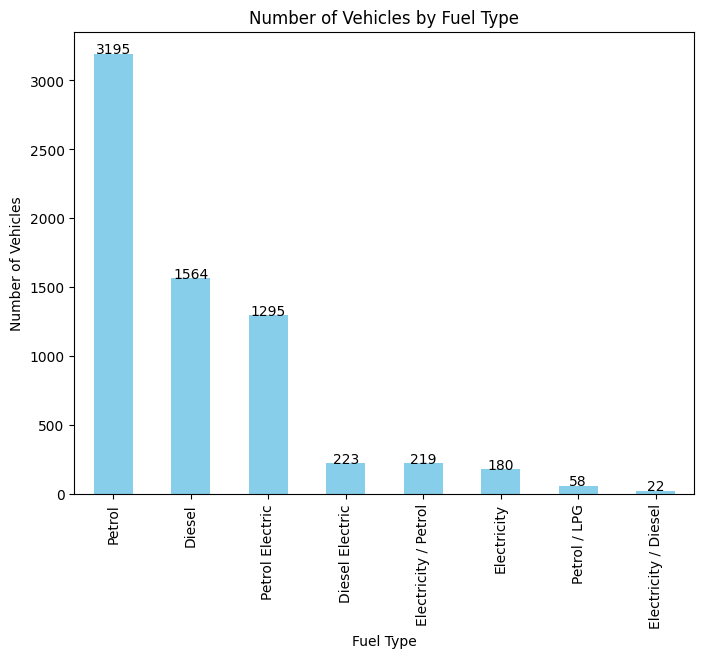

In [116]:
fuel_type_counts = data['fuel'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
ax = fuel_type_counts.plot(kind='bar', color='skyblue')
fuel_type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
for i, count in enumerate(fuel_type_counts):
    ax.text(i, count + 0.1, str(count), ha='center')
plt.show()

In [117]:
data_Make = data['manufacturer'].value_counts().reset_index().rename(columns={'index':'manufacturer','manufacturer':'manufacturer'})[0:25]

fig = go.Figure(go.Bar(x=data_Make['manufacturer'],y=data_Make['count'],
                marker={'color': data_Make['count'],
                'colorscale': 'Plasma'},
                text=data_Make['count'],
                textposition = "outside"))
fig.update_layout(title_text='Manufacturers',xaxis_title="Company ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [118]:
fig = px.histogram(data, x="engine_size_cm3")
fig.update_traces(text=fig.data[0].y, textposition='outside')
fig.update_layout(
    title='Engine_size_cm3',
    xaxis_title='Size',
    yaxis_title='Number Of Vehicles',
    title_x=0.5
)
fig.show()

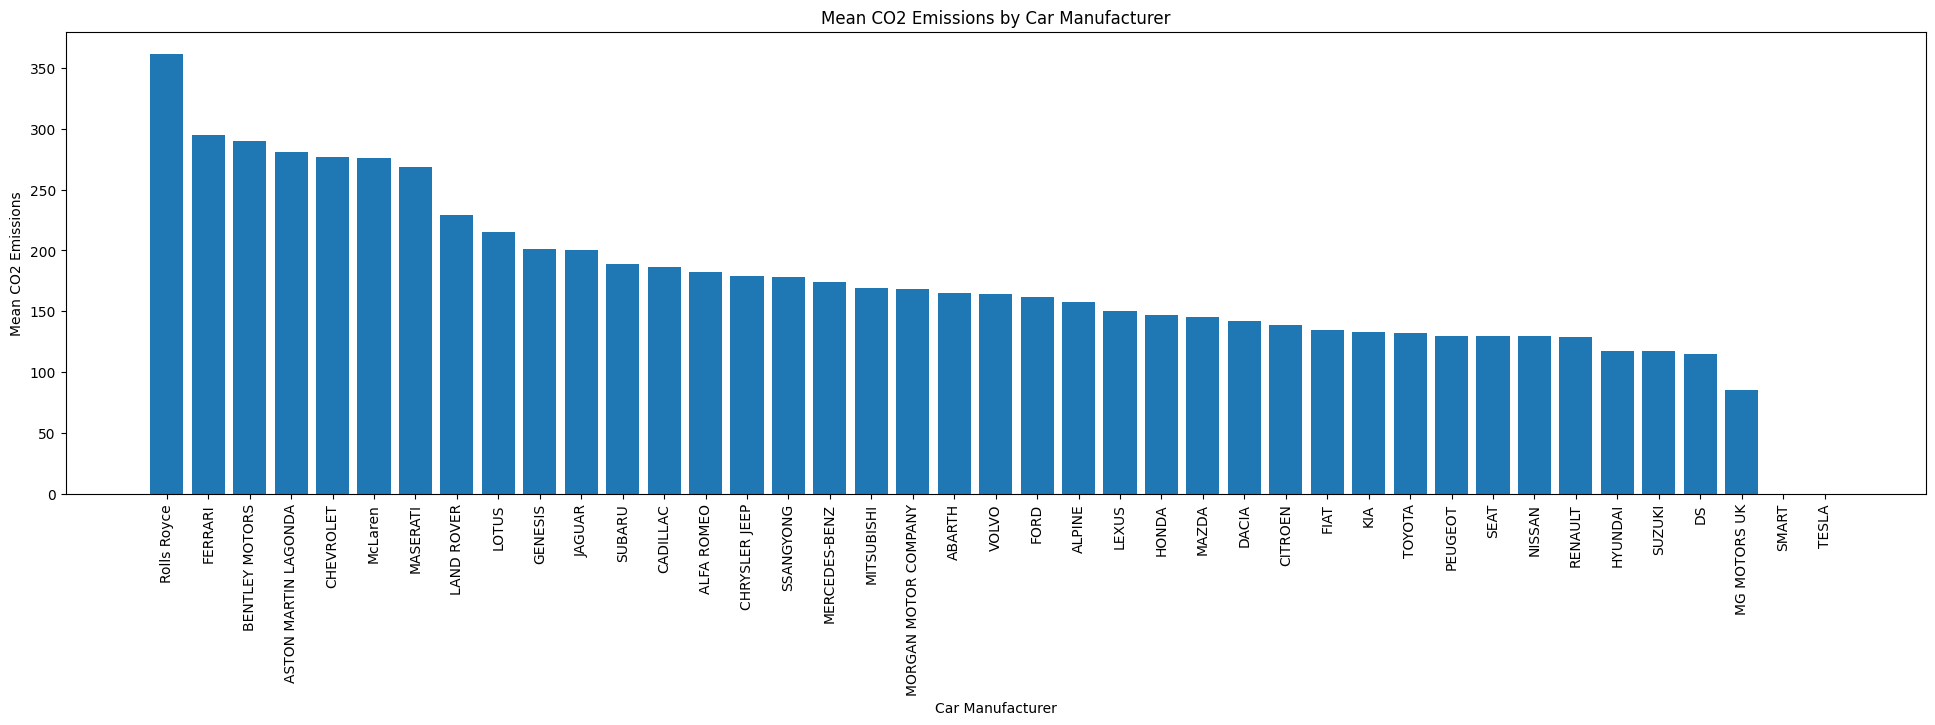

In [119]:
plt.figure(figsize = (24, 6))
mean_data_by_make = data.groupby('manufacturer')['co2_emissions_gPERkm'].mean().sort_values(ascending=False)
plt.bar(mean_data_by_make.index, mean_data_by_make) # the indexes are the unique car makes
plt.title("Mean CO2 Emissions by Car Manufacturer")
plt.xlabel("Car Manufacturer")
plt.ylabel("Mean CO2 Emissions")
plt.xticks(rotation = 90)  # rotate x-axis labels
plt.show()

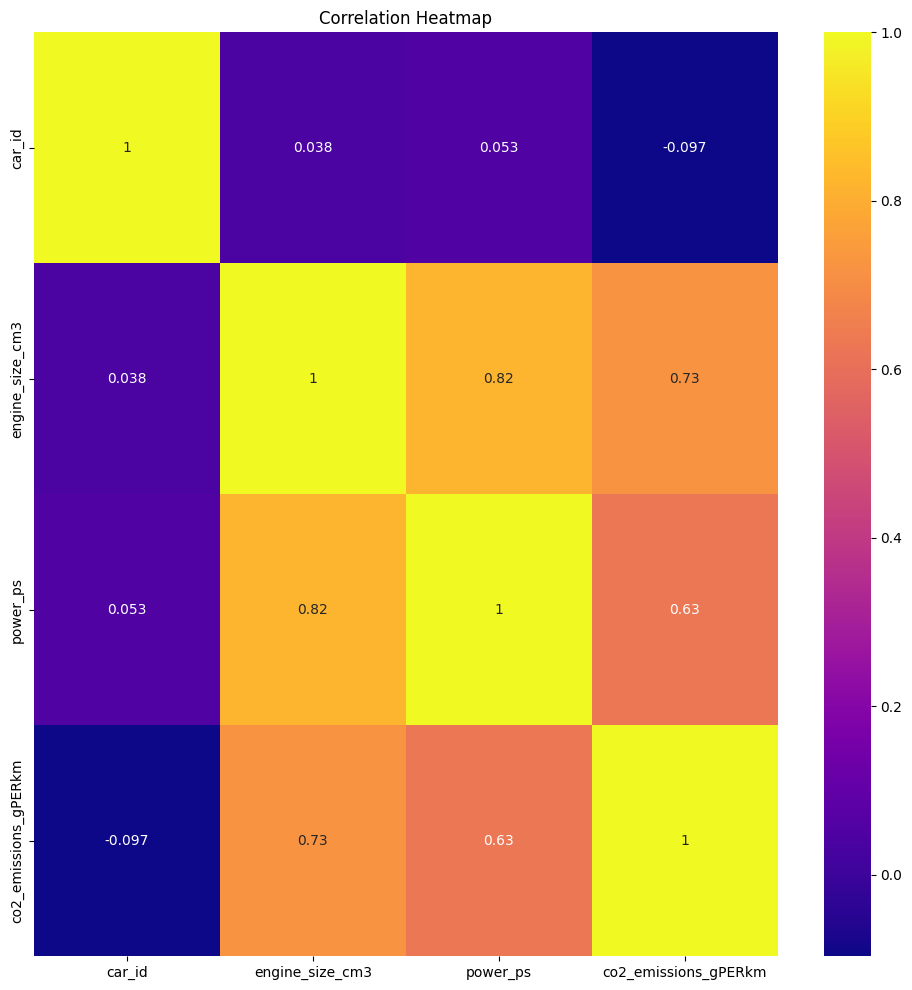

In [120]:
# heatmap to see the correlations between numeric values
numeric_columns = data.select_dtypes(exclude=['object'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(correlation_matrix, cmap = 'plasma', annot = True)
plt.title('Correlation Heatmap')
plt.show()

From the heatmap, we can see that engine cylinders and engine displacement seem to have a high correleation to tailpipe CO2 in g/mile ft1

Now let's determine if the data is normally distributed

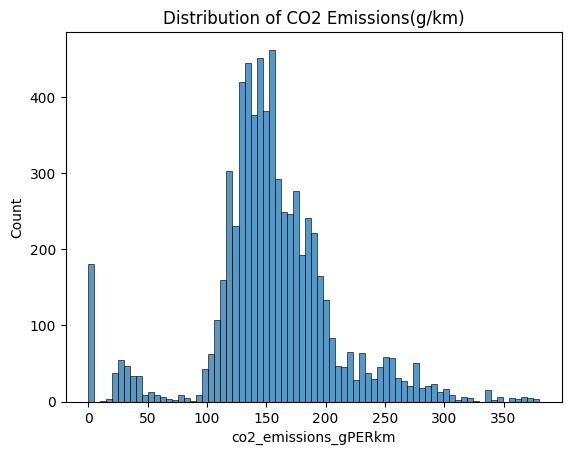

In [121]:
sns.histplot(x = data['co2_emissions_gPERkm'])
plt.title('Distribution of CO2 Emissions(g/km)')
plt.show()

The data aappears to be normally distributed. There are some outliers

In [122]:
Q1 = data['co2_emissions_gPERkm'].quantile(0.25)
Q3 = data['co2_emissions_gPERkm'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.7 * IQR   # can adjust these multipliers
upper_bound = Q3 + 1.7 * IQR

result = data[(data['co2_emissions_gPERkm'] >= lower_bound) & (data['co2_emissions_gPERkm'] <= upper_bound)]

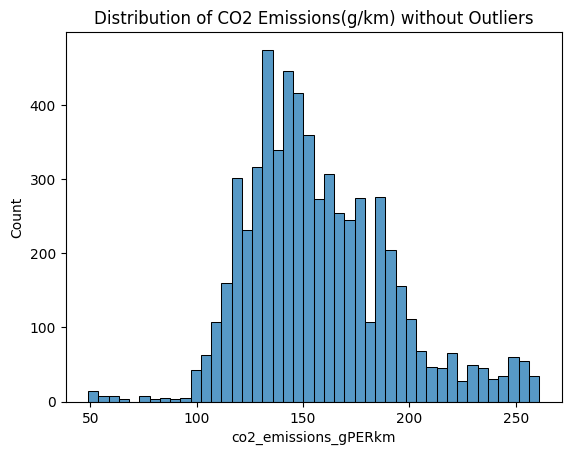

In [123]:
sns.histplot(x=result['co2_emissions_gPERkm'])
plt.title('Distribution of CO2 Emissions(g/km) without Outliers')
plt.show()

With this, we have removed some outliers using the Interquartile Range method.

Since we have some categorical columns in the dataset, we need to encode them using one hot encoding in order to test our models.


For this dataset in particular, I included manufacturer and model because there is not enough data to predict more accurately.

In [124]:
data_encoded = pd.get_dummies(result, columns=['manufacturer', 'model', 'transmission', 'fuel'])
data_encoded.head()

,car_id,description,transmission_type,engine_size_cm3,powertrain,power_ps,co2_emissions_gPERkm,manufacturer_ABARTH,manufacturer_ALFA ROMEO,manufacturer_ALPINE,...,transmission_SA6,transmission_SAT5,transmission_SAT6,fuel_Diesel,fuel_Diesel Electric,fuel_Electricity / Diesel,fuel_Electricity / Petrol,fuel_Petrol,fuel_Petrol / LPG,fuel_Petrol Electric
0,1.0,1.4 TJET 145bhp,Manual,1368.0,Internal Combustion Engine (ICE),145.0,161.0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2.0,1.4 TJET 145bhp,Manual,1368.0,Internal Combustion Engine (ICE),145.0,153.0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3.0,595 1.4 145 BHP,Manual,1368.0,Internal Combustion Engine (ICE),145.0,169.0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4.0,595 1.4 145 BHP,Manual,1368.0,Internal Combustion Engine (ICE),145.0,162.0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,5.0,595 1.4 145 BHP Convertible,Manual,1368.0,Internal Combustion Engine (ICE),145.0,169.0,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [125]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6087 entries, 0 to 6755
Columns: 435 entries, car_id to fuel_Petrol Electric
dtypes: bool(428), float64(4), object(3)
memory usage: 2.9+ MB


In [126]:
# Drop rows with any missing values
data_encoded.dropna(inplace=True)
data_encoded = data_encoded.drop(['description', 'transmission_type', 'powertrain'], axis=1)

Creating the LinearRegression model now

In [127]:
X = data_encoded.drop('co2_emissions_gPERkm', axis=1)  # Features
y = data_encoded['co2_emissions_gPERkm']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [128]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
model.score(X_train, y_train)

Mean Squared Error: 118.95289789694603
Root Mean Squared Error: 10.906552979605703
R-squared: 0.8994931134615085


0.9176561442900246

Using KNN:

In [129]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)  # 5 for now
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [130]:
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
knn_regressor.score(X_train, y_train)

Mean Squared Error: 164.89773763911694
Root Mean Squared Error: 12.841251404715855
R-squared: 0.860672934410502


0.9285147607149303

Using Random Forest

In [131]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [132]:
y_pred = random_forest_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
random_forest_regressor.score(X_train, y_train)

Mean Squared Error: 131.24938793103448
Root Mean Squared Error: 11.45641252447879
R-squared: 0.8891034386361965


0.9846409580397025

From all the models, they seem to have a MSE of around 130-160 which is not ideal, however compared to the other two datasets, the models perform excellently. Each of the models do have an R-squared value around 86-89 indicating that they explain 86-89% of variance.
Therefore, the values obtained may be due to insufficient data columns like fuel consumption etc, that are present in the other 2 datasets.